In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline
from numpy import random

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
target_names = digits.target_names

In [3]:
# Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(y)

In [4]:
# Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X)

In [5]:
# Construct Within-class covariance matrix S_W
S_W = np.zeros((64,64))
for i in range(10):
    S_W += np.cov(X_train_std[y==i].T)
    #S_W += np.cov(X_train_std[y==i].T)
print('Within-class covariance matrix')
x = random.randint(100, size=(1, 64))
S_W[0]=x
print(S_W)

Within-class covariance matrix
[[ 4.50000000e+01  4.90000000e+01  5.90000000e+01 ...  8.90000000e+01
   0.00000000e+00  4.20000000e+01]
 [ 0.00000000e+00  8.35495617e+00  3.07149208e+00 ... -4.64270793e-01
  -4.71405734e-01 -8.92473479e-01]
 [ 0.00000000e+00  3.07149208e+00  5.55827385e+00 ... -5.32417637e-01
  -2.51719523e-02  3.39872280e-01]
 ...
 [ 0.00000000e+00 -4.64270793e-01 -5.32417637e-01 ...  5.29462910e+00
   3.19913907e+00  1.41993954e+00]
 [ 0.00000000e+00 -4.71405734e-01 -2.51719523e-02 ...  3.19913907e+00
   6.56522302e+00  4.51197993e+00]
 [ 0.00000000e+00 -8.92473479e-01  3.39872280e-01 ...  1.41993954e+00
   4.51197993e+00  8.70534039e+00]]


In [6]:
# Construct between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(10)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((64,64))
for i in range(10):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(64,1)).dot(((vecs[i]-mean_overall).reshape(1,64))))

In [7]:
print('between-class scatter matrix') 

print(S_B)

between-class scatter matrix
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         299.91216616 451.87094215 ...  30.14392955 131.48617817
   78.41875763]
 [  0.         451.87094215 806.49640322 ...  20.07565285 133.64033134
   85.04791133]
 ...
 [  0.          30.14392955  20.07565285 ... 851.2364289  593.52319768
  215.60554033]
 [  0.         131.48617817 133.64033134 ... 593.52319768 625.56373409
  307.06847641]
 [  0.          78.41875763  85.04791133 ... 215.60554033 307.06847641
  240.45847664]]


In [8]:
# Calculate sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1357.7870919489185
855.274921732994
795.396785279093
547.2467699843048
389.7539214488633
307.60592970881055
202.39280512178664
137.1396026780281
97.6027889998683
4.338892158374823e-13
3.915665162025346e-13
3.915665162025346e-13
3.535908942282696e-13
3.4202472401286333e-13
3.4202472401286333e-13
2.806821792954748e-13
2.806821792954748e-13
2.3494183524094476e-13
2.3494183524094476e-13
2.3216077256264304e-13
2.3216077256264304e-13
2.317211115052786e-13
2.317211115052786e-13
2.296348003102715e-13
2.296348003102715e-13
2.284454814530443e-13
2.228570765482392e-13
2.113432477318872e-13
2.113432477318872e-13
1.7128513836845264e-13
1.7128513836845264e-13
1.633149109554412e-13
1.5584315199178202e-13
1.5584315199178202e-13
1.510412279837309e-13
1.483329310245996e-13
1.483329310245996e-13
1.333903565565304e-13
1.333903565565304e-13
1.328218130379301e-13
1.328218130379301e-13
1.0496051520671848e-13
1.0496051520671848e-13
9.086308075057245e-14
9.086308075057245e-14


In [9]:
# Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(64,1),eigen_pairs[1][1][:, ].reshape(64,1),eigen_pairs[2][1][:, ].reshape(64,1),eigen_pairs[3][1][:, ].reshape(64,1))).real
X_train_lda = X_train_std.dot(W)
#X_train_lda = X_train_std.dot(eigen_pairs)

Text(0.5, 1.0, 'LDA of IRIS dataset - step by step')

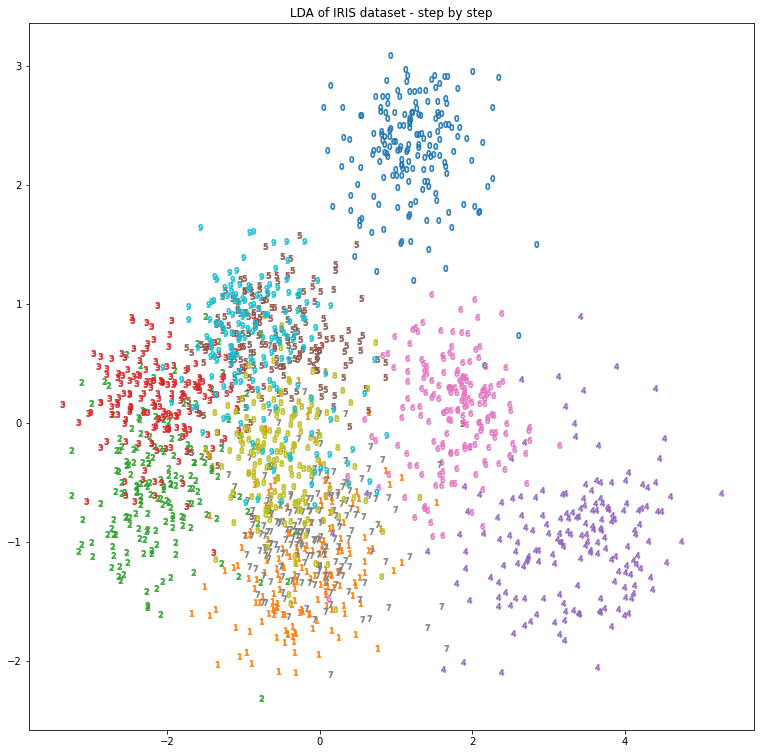

In [10]:
# #colors = ['navy', 'turquoise', 'darkorange']
# for color, i, target_name in zip(colors, [0,1,2,3,4,5,6,7,8,9], target_names):
#     plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], color=color, alpha=.8, lw=2,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset - step by step')

# plt.show()
fig, axes = plt.subplots(figsize=[13,13])
for i, target_name in zip([0,1,2,3,4,5,6,7,8,9], target_names):
    plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], alpha=.8,
                        label=target_name, marker='$%.f$'%i)
plt.title('LDA of IRIS dataset - step by step')

# Dùng hàm sklearn

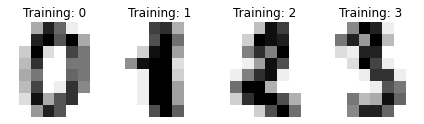

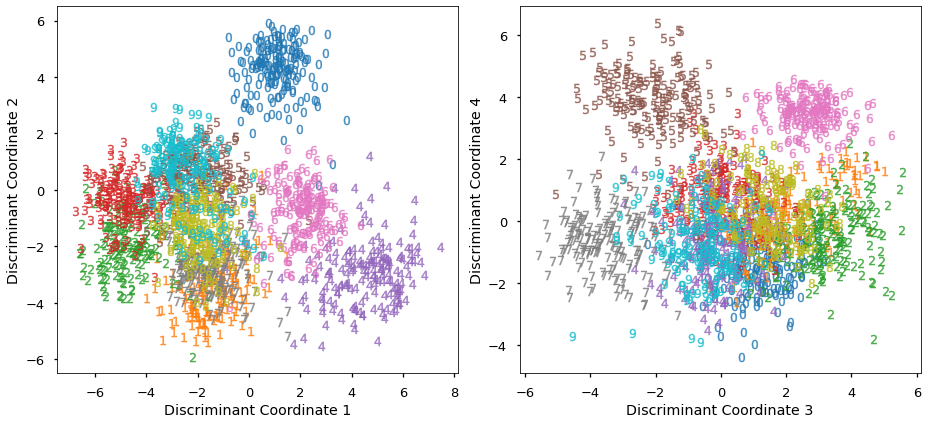

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.tight_layout()
    
X = digits.data
y = digits.target
target_names = digits.target_names

# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=4, solver='eigen', shrinkage=0.1)

# Train lda on the first half of the digits
lda = lda.fit(X[:1797], y[:1797])
X_r_lda = lda.transform(X)

# Visualize transformed data on learnt discriminant coordinates
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[13,6])
    for i, target_name in zip([0,1,2,3,4,5,6,7,8,9], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8,
                        label=target_name, marker='$%.f$'%i)
        axes[1].scatter(X_r_lda[y == i, 2], X_r_lda[y == i, 3], alpha=.8,
                        label=target_name, marker='$%.f$'%i)
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('Discriminant Coordinate 3')
    axes[1].set_ylabel('Discriminant Coordinate 4')
    plt.tight_layout()